In [ ]:
!pip install gdown -q
import gdown

# Define the Google Drive file ID
file_id = '1d3tNyjyfKYewmyvgbB8NN9AB4gYPG5sm'

# Define the output filename
output = 'creditcard.csv'

# Download the file
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1d3tNyjyfKYewmyvgbB8NN9AB4gYPG5sm
From (redirected): https://drive.google.com/uc?id=1d3tNyjyfKYewmyvgbB8NN9AB4gYPG5sm&confirm=t&uuid=5e9f12cd-8793-49ed-aeac-6efaec66e0b6
To: /content/creditcard.csv
100%|██████████| 151M/151M [00:02<00:00, 75.4MB/s]


'creditcard.csv'

In [ ]:
import pandas as pd

# Load dataset
try:
    df = pd.read_csv("creditcard.csv", sep=',') # Try comma delimiter first
except Exception as e:
    print(f"Error with comma delimiter: {e}")
    try:
        df = pd.read_csv("creditcard.csv", sep=';') # Try semicolon delimiter
    except Exception as e:
        print(f"Error with semicolon delimiter: {e}")
        # You can add more delimiters here if needed
        print("Could not read the CSV with common delimiters. Please check the file content.")


# Quick overview
print(df.shape)
print(df.head())
print(df.info())

(284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V

Class
0    284315
1       492
Name: count, dtype: int64


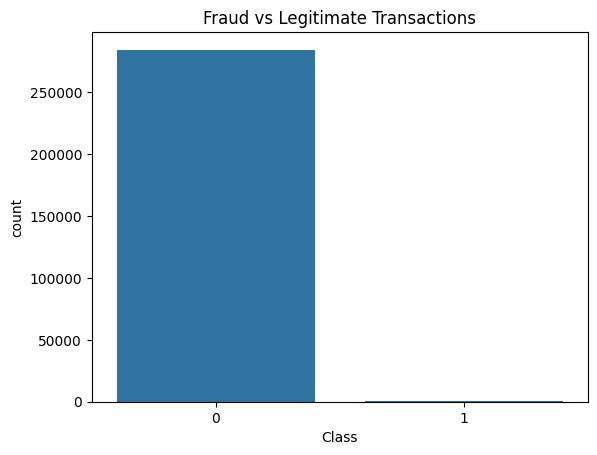

In [ ]:
# Check class distribution
print(df['Class'].value_counts())

# Plot distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Class', data=df)
plt.title('Fraud vs Legitimate Transactions')
plt.show()


          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87


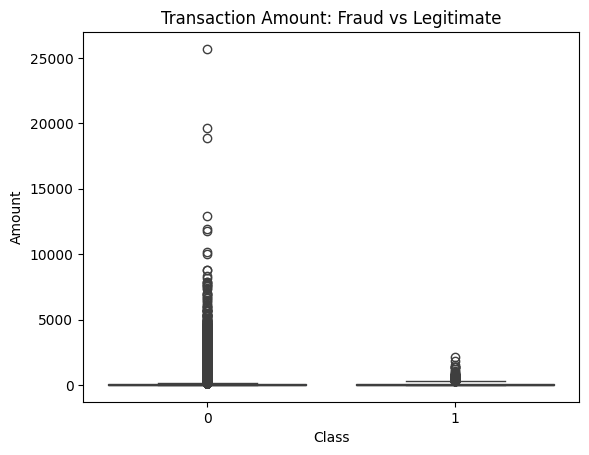

In [ ]:
# Summary statistics
print(df.groupby('Class')['Amount'].describe())

# Visualize
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount: Fraud vs Legitimate')
plt.show()


In [ ]:
# Convert seconds to hours
df['Hour'] = (df['Time'] // 3600) % 24  # Mod 24 to get hour in day

In [ ]:
# Separate datasets
df_legit = df[df['Class'] == 0]
df_fraud = df[df['Class'] == 1]


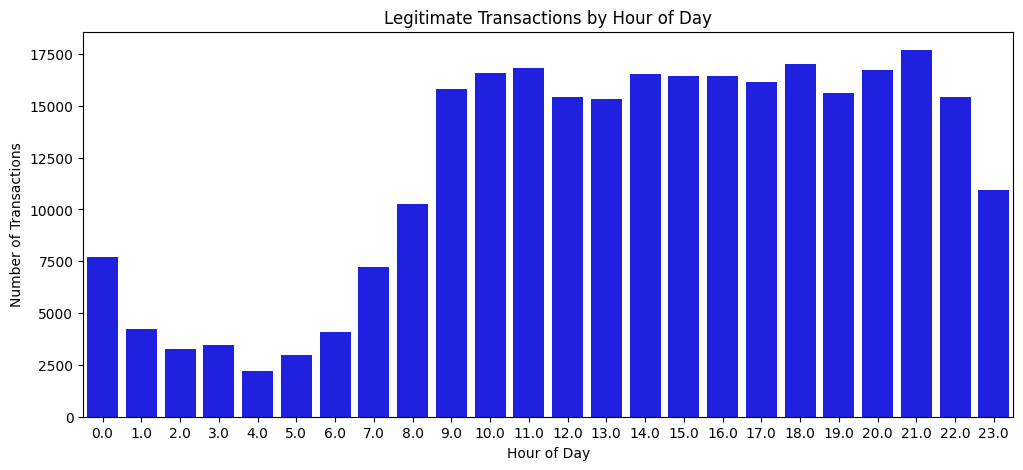

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.countplot(x='Hour', data=df_legit, color='blue')
plt.title('Legitimate Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.show()


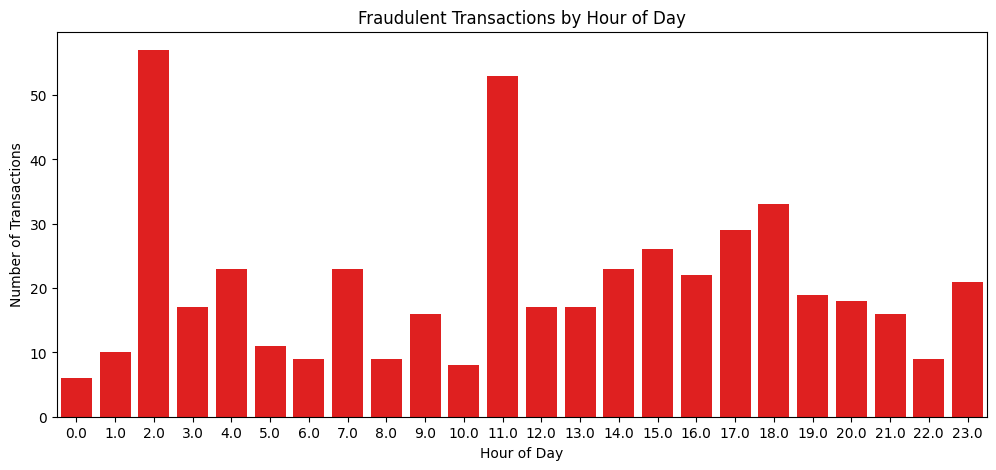

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='Hour', data=df_fraud, color='red')
plt.title('Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.show()


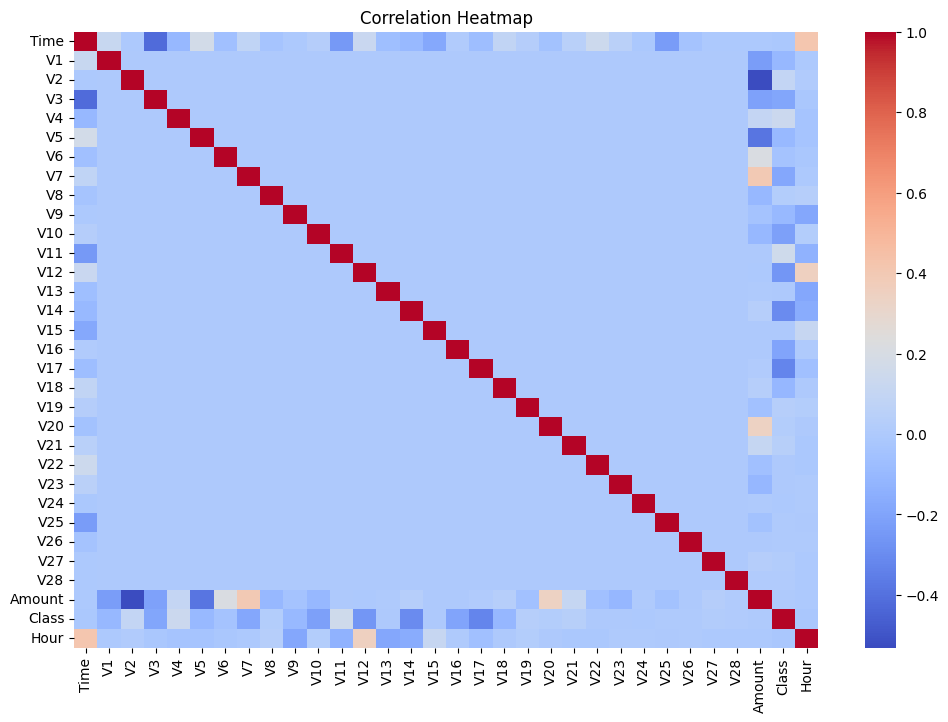

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time_scaled'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))


In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Hour,Amount_scaled,Time_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,0.244964,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,-0.342475,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,1.160686,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,0.140534,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,-0.073403,-1.996541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23.0,-0.350151,1.641931
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23.0,-0.254117,1.641952
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23.0,-0.081839,1.641974
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23.0,-0.313249,1.641974


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Class', 'Time', 'Amount', 'Hour'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [ ]:
X_train_res

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount_scaled,Time_scaled
0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.323963,1.413095
1,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.341275,0.624644
2,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,0.346835,-1.129186
3,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.328841,0.796203
4,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,-0.008994,-0.746606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454897,-1.070294,3.314965,-5.016165,5.514557,-2.113600,-1.761246,-5.156619,1.089526,-3.821101,-6.986847,...,1.181820,0.204792,-0.379096,-0.258549,0.920862,0.256826,1.274599,0.600423,-0.292089,-0.986357
454898,-0.920597,-0.265912,1.234809,1.469202,-0.238239,0.814437,1.233822,-0.163184,-0.295413,-0.049855,...,0.244462,0.718297,0.408869,-0.622278,-0.029450,-0.049835,-0.045940,-0.007801,0.764266,-0.699620
454899,-1.553010,2.075919,-3.130621,2.221775,0.743571,-1.898446,-1.085329,-0.740601,-1.715078,-2.920149,...,-0.099088,0.801804,-0.000641,-0.266251,-0.245730,-0.394622,0.466634,0.381819,-0.243473,1.370496
454900,-3.246143,2.454764,-4.506966,2.339670,-0.903451,-1.581574,-2.523907,-0.353808,-1.479345,-4.377285,...,1.268547,1.026589,-0.098068,0.150988,-0.348212,0.044490,-0.499456,0.920966,-0.062580,0.212581


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9572835078037969


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_probs_rf = rf.predict_proba(X_test)[:,1]

print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_probs_rf))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.77      0.83        98

    accuracy                           1.00     56962
   macro avg       0.95      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9487017179550492


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

# Initialize model
# scale_pos_weight helps XGBoost handle imbalance
scale = (y_train == 0).sum() / (y_train == 1).sum()

xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    scale_pos_weight=scale,  # handle imbalance
    eval_metric='logloss'
)

# Train on raw imbalanced data
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_probs_xgb))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9778219496858958


In [ ]:
from sklearn.metrics import confusion_matrix

lr_smote = LogisticRegression(max_iter=1000)
lr_smote.fit(X_train_res, y_train_res)

y_pred_lr = lr_smote.predict(X_test)
y_probs_lr = lr_smote.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred_lr))
print("Logistic Regression (SMOTE):\n", classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_probs_lr))


[[55406  1458]
 [    8    90]]
Logistic Regression (SMOTE):
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC-AUC: 0.9698482164390798


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

rf_smote = RandomForestClassifier(n_estimators=10, random_state=42)
rf_smote.fit(X_train_res, y_train_res)

y_pred_rf = rf_smote.predict(X_test)
y_probs_rf = rf_smote.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred_rf))
print("Random Forest (SMOTE):\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_probs_rf))

[[56851    13]
 [   19    79]]
Random Forest (SMOTE):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.81      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9474817466378787


In [ ]:
xgb_smote = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_smote.fit(X_train_res, y_train_res)

y_pred_xgb = xgb_smote.predict(X_test)
y_probs_xgb = xgb_smote.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred_xgb))
print("XGBoost (SMOTE):\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_probs_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:38:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[56763   101]
 [   12    86]]
XGBoost (SMOTE):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.46      0.88      0.60        98

    accuracy                           1.00     56962
   macro avg       0.73      0.94      0.80     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9801059527637729


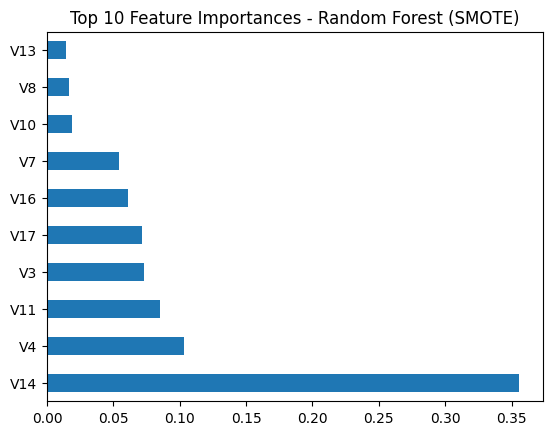

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

feat_importances = pd.Series(rf_smote.feature_importances_, index=X_train_res.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances - Random Forest (SMOTE)")
plt.show()


In [ ]:
X_train_res_top10 = X_train_res[['V13', 'V8', 'V10', 'V7', 'V16', 'V17', 'V3', 'V11', 'V4', 'V14']]
X_test_top10 = X_test[['V13', 'V8', 'V10', 'V7', 'V16', 'V17', 'V3', 'V11', 'V4', 'V14']]

In [ ]:
rf_smote = RandomForestClassifier(n_estimators=10, random_state=42)
rf_smote.fit(X_train_res_top10, y_train_res)

y_pred_rf = rf_smote.predict(X_test_top10)
y_probs_rf = rf_smote.predict_proba(X_test_top10)[:,1]

print(confusion_matrix(y_test, y_pred_rf))
print("Random Forest (SMOTE):\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_probs_rf))

[[56825    39]
 [   18    80]]
Random Forest (SMOTE):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.67      0.82      0.74        98

    accuracy                           1.00     56962
   macro avg       0.84      0.91      0.87     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9625367328276274


In [ ]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.0017, random_state=42)
y_pred_iso = iso_forest.fit_predict(X)


In [ ]:
from sklearn.svm import OneClassSVM

X_legit = X[y==0]
oc_svm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.0017)
oc_svm.fit(X_legit)

y_pred_svm = oc_svm.predict(X)


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.0017)
y_pred_lof = lof.fit_predict(X)


In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score, average_precision_score

# Map predictions: -1 → 1 (fraud), 1 → 0 (legit)
def evaluate_model(y_true, y_pred, model_name):
    y_pred = np.where(y_pred == -1, 1, 0)
    auc = roc_auc_score(y_true, y_pred)
    pr_auc = average_precision_score(y_true, y_pred)
    print(f"{model_name} → ROC-AUC: {auc:.4f}, PR-AUC: {pr_auc:.4f}")

evaluate_model(y, y_pred_iso, "Isolation Forest")
evaluate_model(y, y_pred_svm, "One-Class SVM")
evaluate_model(y, y_pred_lof, "Local Outlier Factor")


Isolation Forest → ROC-AUC: 0.6366, PR-AUC: 0.0776
One-Class SVM → ROC-AUC: 0.8892, PR-AUC: 0.1951
Local Outlier Factor → ROC-AUC: 0.4991, PR-AUC: 0.0017


In [ ]:
from sklearn.model_selection import train_test_split

# Take only 20% of data for hyperparameter tuning
X_sample, _, y_sample, _ = train_test_split(X, y,
                                            test_size=0.99,
                                            stratify=y,
                                            random_state=42)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Example: RandomForest tuning
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

rf = RandomForestClassifier(class_weight="balanced", random_state=42)

rf_random = RandomizedSearchCV(rf,
                               param_distributions=param_dist,
                               n_iter=20,
                               cv=2,
                               scoring="roc_auc",
                               n_jobs=-1,
                               random_state=42)

rf_random.fit(X_sample, y_sample)

print("Best params:", rf_random.best_params_)
print("Best ROC-AUC:", rf_random.best_score_)


Best params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best ROC-AUC: 0.9995310942651467


In [ ]:
best_rf = rf_random.best_estimator_

In [ ]:
best_rf

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_split=5, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

best_rf.fit(X_sample, y_sample)

y_pred_bestrf = best_rf.predict(X_test)
y_probs_bestrf = best_rf.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred_bestrf))
print("Random Forest (SMOTE):\n", classification_report(y_test, y_pred_bestrf))
print("ROC-AUC:", roc_auc_score(y_test, y_probs_bestrf))

[[56851    13]
 [   44    54]]
Random Forest (SMOTE):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.55      0.65        98

    accuracy                           1.00     56962
   macro avg       0.90      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9416834509549459


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight = (len(y_sample) - sum(y_sample)) / sum(y_sample)  # handle imbalance
)

param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 1, 5]
}

xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,      # number of random combinations
    cv=2,
    scoring="roc_auc",
    verbose=1,
    random_state=42,
    n_jobs=-1
)

xgb_random.fit(X_sample, y_sample)

print("Best params:", xgb_random.best_params_)
print("Best ROC-AUC:", xgb_random.best_score_)


Fitting 2 folds for each of 20 candidates, totalling 40 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:33:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.8}
Best ROC-AUC: 0.9991792293812622


In [ ]:
best_xgb = xgb_random.best_estimator_

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

best_xgb.fit(X_sample, y_sample)

y_pred_bestxgb = best_rf.predict(X_test)
y_probs_bestxgb = best_rf.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred_bestxgb))
print("Random Forest (SMOTE):\n", classification_report(y_test, y_pred_bestxgb))
print("ROC-AUC:", roc_auc_score(y_test, y_probs_bestxgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:34:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[56851    13]
 [   44    54]]
Random Forest (SMOTE):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.55      0.65        98

    accuracy                           1.00     56962
   macro avg       0.90      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9416834509549459


In [ ]:
import numpy as np

# prob_sup: predicted fraud probability from supervised model (RF/XGB)
# anomaly_pred: predictions from anomaly detector (-1 = anomaly, 1 = normal)

def ensemble_rule_boost(prob_sup, anomaly_pred, boost=0.25):
    """
    Increase supervised fraud probability if anomaly detector flags the transaction.
    prob_sup: numpy array of shape (n_samples,)
    anomaly_pred: numpy array of shape (n_samples,) with -1 for anomaly, 1 for normal
    boost: how much to increase fraud probability (0.0–1.0)
    """
    adjusted = np.clip(prob_sup + (boost * (anomaly_pred == -1)), 0, 1)
    return adjusted

# Example:
# supervised model probabilities
prob_sup = rf_smote.predict_proba(X_test)[:,1]

# anomaly model predictions (e.g., from IsolationForest)
anomaly_pred = oc_svm.predict(X_test)   # outputs -1 for anomaly, 1 for normal

# combine
ensemble_probs = ensemble_rule_boost(prob_sup, anomaly_pred, boost=0.25)

# evaluate performance with new probabilities
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

# choose a threshold (default 0.5 here, but you can tune as discussed)
y_pred = (ensemble_probs >= 0.5).astype(int)

print("ROC-AUC:", roc_auc_score(y_test, ensemble_probs))
print("PR-AUC:", average_precision_score(y_test, ensemble_probs))
print(classification_report(y_test, y_pred))



ROC-AUC: 0.947323115374456
PR-AUC: 0.8459608694731258
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.86      0.82        98

    accuracy                           1.00     56962
   macro avg       0.90      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
y_pred_proba = np.array([ensemble_rule_boost(p, a) for p,a in zip(prob_sup, anomaly_pred)])
y_pred_proba

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[56842    22]
 [   14    84]]


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, average_precision_score, roc_auc_score

boost_values = [0.1, 0.15, 0.2, 0.25, 0.3]
thresholds = np.linspace(0.1, 0.9, 9)

results = []

for boost in boost_values:
    # adjust probabilities
    adj_probs = ensemble_rule_boost(prob_sup, anomaly_pred, boost=boost)

    for thr in thresholds:
        preds = (adj_probs >= thr).astype(int)

        f1 = f1_score(y_test, preds)
        prec = precision_score(y_test, preds)
        rec = recall_score(y_test, preds)
        pr_auc = average_precision_score(y_test, adj_probs)
        roc_auc = roc_auc_score(y_test, adj_probs)

        results.append({
            "boost": boost,
            "threshold": thr,
            "precision": prec,
            "recall": rec,
            "f1": f1,
            "pr_auc": pr_auc,
            "roc_auc": roc_auc
        })

# Put into DataFrame for analysis
import pandas as pd
results_df = pd.DataFrame(results).sort_values(by="f1", ascending=False)
print(results_df.head(10))


    boost  threshold  precision    recall        f1    pr_auc   roc_auc
44   0.30        0.9   0.951220  0.795918  0.866667  0.845631  0.947324
35   0.25        0.9   0.951220  0.795918  0.866667  0.845961  0.947323
17   0.15        0.9   0.950000  0.775510  0.853933  0.853328  0.947380
26   0.20        0.9   0.950000  0.775510  0.853933  0.843145  0.947349
8    0.10        0.9   0.950000  0.775510  0.853933  0.848830  0.947380
6    0.10        0.7   0.917647  0.795918  0.852459  0.848830  0.947380
16   0.15        0.8   0.917647  0.795918  0.852459  0.853328  0.947380
42   0.30        0.7   0.877778  0.806122  0.840426  0.845631  0.947324
33   0.25        0.7   0.877778  0.806122  0.840426  0.845961  0.947323
43   0.30        0.8   0.877778  0.806122  0.840426  0.845631  0.947324


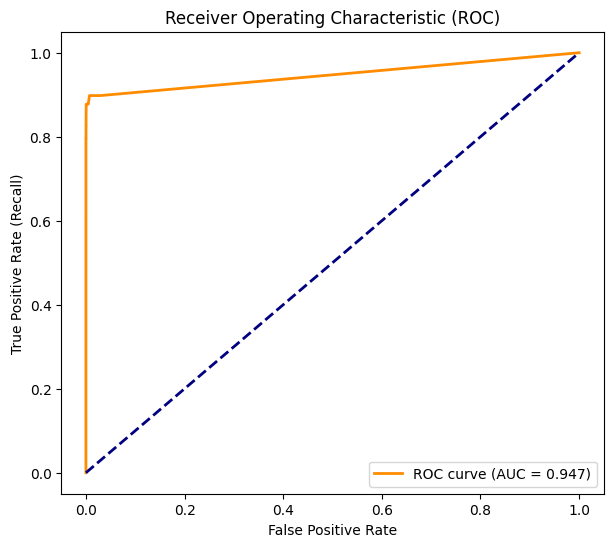

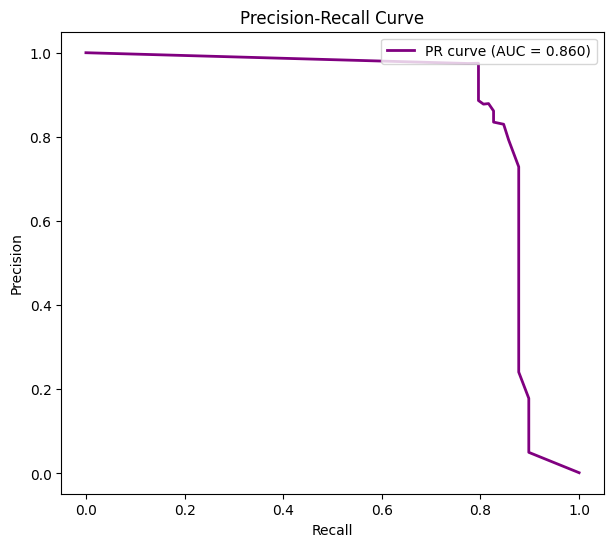

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(7,6))
plt.plot(recall, precision, color='purple', lw=2, label=f"PR curve (AUC = {pr_auc:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()


In [ ]:
from google.colab import files

files.download("rf_smote_model.pkl")
files.download("ocsvm_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>